In [1]:
import os
import numpy as np
import json
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import pearsonr as pearr

1 IFT88
2 CHMP4A
3 PWWP2A
4 MFSD12
5 SATB1
6 ZNF562
7 EFTUD2
8 KLF6
8 _ last saved snp2 loaded.
9 IMPDH2
10 KCNE4
11 ETFDH
12 VWA1
13 BAIAP2L1
14 RAB2B
15 FBXL17
16 SMARCC1
17 SYT12
18 C1orf172
19 STK24
20 DENND1A
21 ADCY4
22 RPS27A
23 CPSF6
24 MAPKAPK3
24 _ last saved snp2 loaded.
24 _ last saved snp2 loaded.
24 _ last saved snp2 loaded.
24 _ last saved snp2 loaded.
25 MPZ
26 TMOD3
27 SRSF5
28 FAM3B
29 CTDNEP1
30 PPFIBP1
31 C11orf54
32 RIOK1
33 ZNF544
34 HELQ
34 _ last saved snp2 loaded.
35 PPP1R37
36 CDC20
37 DCAF17
38 HCN3
39 C4orf27
40 AGO4
41 KXD1
42 CENPJ
43 SEC61A1
44 C1orf54
44 _ last saved snp2 loaded.
44 _ last saved snp2 loaded.
45 POLR2M
46 CEP95
46 _ last saved snp2 loaded.
46 _ last saved snp2 loaded.
47 RETSAT
48 DUSP5
49 GPCPD1
50 NOP10
51 OS9
52 KCTD7
53 CD38
54 PDLIM2
55 PTMA
56 DHX8
57 AIDA
58 SNAP25
59 SEPP1
60 CMC1
61 TALDO1
62 H2AFV
63 THOC5
64 GRASP
65 WDR36
66 VPS4B
67 RERE
68 MRPL43
69 ARHGAP42
70 CDAN1
71 TXNDC15
72 PSEN2
73 MRPL30
74 PRR11
75 CNOT11
76 PPP6R3

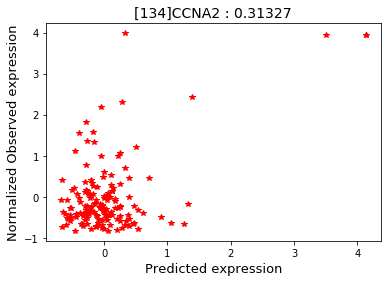

135 FOLR2
136 TMEM55B
137 ATF4
138 NEK8
139 A1CF
140 SLC35G5
141 HEATR5A
142 ADRB2
143 BPGM
144 ATP13A4
145 LOX
146 CHML
147 CDK13
148 IFT20
149 FN3K
150 C17orf80
151 IFT43
152 GORASP1
153 RIC8A
154 MRPS16
155 CPSF2
156 CCDC47
157 MAPRE1
158 DYRK4
159 ACTR3
160 STK17A
161 TRIM27
162 SKIV2L2
163 LYRM2
164 CDC34
165 MTA3
166 IL15
167 TEAD3
168 DGKD
169 YY1AP1
170 ZNF354C
171 CUEDC1
172 C11orf86
173 PLEK2
174 ZNF205
175 GPN3
176 SOCS2
177 CST3
178 DBF4
179 ETV4
180 LAMC2
181 RBMS3
181 _ last saved snp2 loaded.
182 RELL2
183 PTPN23
184 RAB3IP
185 POLR3G
186 MRPS30
187 EFNA4
188 P2RX3
188 _ last saved snp2 loaded.
188 _ last saved snp2 loaded.
188 _ last saved snp2 loaded.
189 DCAF10
190 CDC42
191 WDR83OS
192 BET1L
193 COMMD2
194 ZBTB11
195 FAHD2B
196 UBE2Z
197 TMEM88
198 CYP2C9
199 SLCO4C1
200 ABI1


In [2]:
trial_num = 5
model_num = 1
tissue_num = 27

ensg_name = json.load(open('whole_ensg2name.json'))
name_rsqr = json.load(open('low200_name2rsqr.json'))

gene_data_name = 'UTMOST_low200_Liver'
gene_list = os.listdir('../%s/'%gene_data_name)

r_list = []
r_ref_list = []
gene_name_list = []
for g in range(200):
    gene_num = g+1
    gene_name = gene_list[g]
    gene_real_name = ensg_name[gene_name]
    gene_r_score = name_rsqr[gene_real_name]
    r_ref_list.append(gene_r_score)
    gene_name_list.append(gene_real_name)

    print(gene_num, gene_real_name)
    GX_observed = np.array([])
    GX_predicted = np.array([])

    for k in range(5):
        k_num = k+1

        try:
            SNP2_tr = np.load('npy/trial%d/gene%d/model%d/%dtissue_trSNP2_k%d.npy'\
                              %(trial_num, gene_num, model_num, tissue_num, k_num))
            SNP2_te = np.load('npy/trial%d/gene%d/model%d/%dtissue_teSNP2_k%d.npy'\
                              %(trial_num, gene_num, model_num, tissue_num, k_num))
        except FileNotFoundError:
            print('%d _ last saved snp2 loaded.'%gene_num)
            SNP2_tr = np.load('npy/trial%d/gene%d/model%d/%dtissue_trSNP2_k%d_last.npy'\
                              %(trial_num, gene_num, model_num, tissue_num, k_num))
            SNP2_te = np.load('npy/trial%d/gene%d/model%d/%dtissue_teSNP2_k%d_last.npy'\
                              %(trial_num, gene_num, model_num, tissue_num, k_num))

        GX_tr = np.load('npy/trial%d/gene%d/model%d/%dtissue_trGX_k%d.npy'\
                        %(trial_num, gene_num, model_num, tissue_num, k_num))
        GX_te = np.load('npy/trial%d/gene%d/model%d/%dtissue_teGX_k%d.npy'\
                        %(trial_num, gene_num, model_num, tissue_num, k_num))

        GX_observed = np.append(GX_observed, np.reshape(GX_te, -1))
        GX_predicted = np.append(GX_predicted, np.reshape(SNP2_te, -1))
    R_, p = pearr(GX_observed, GX_predicted)
    R2 = R_**2
    
    r_list.append(R2)
    
    if R2>0.25 or gene_num==134:
        print('%s - UTMOST R sqr : %.5f'%(gene_real_name, gene_r_score))
        plt.plot(GX_predicted, GX_observed, 'r*')
        plt.title('[%d]%s : %.5f'%(gene_num, gene_real_name, R2), fontsize=14)
        plt.ylabel('Normalized Observed expression', fontsize=13)
        plt.xlabel('Predicted expression', fontsize=13)
        plt.savefig('img/trial%d/Scatter_model%d_gene%d.png'%(trial_num, model_num, gene_num))
        plt.show()
        
#         plt.plot(GX_predicted, GX_observed, 'r*')
#         plt.title('[%d]%s : %.5f'%(gene_num, gene_real_name, R2), fontsize=14)
#         plt.ylabel('Observed expression', fontsize=13)
#         plt.xlabel('Predicted expression', fontsize=13)
# #         plt.savefig('img/trial%d/Scatter_model%d_gene%d.png'%(trial_num, model_num, gene_num))
#         plt.show()

0.017270340521842963 4.918914316098867e-06


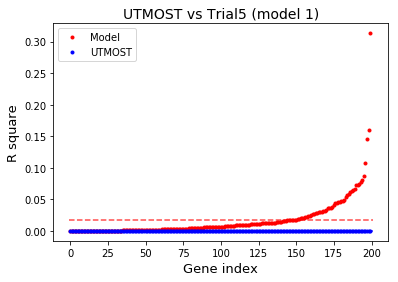

In [3]:
sort_idx = np.argsort(r_list)
avg_model = np.mean(np.array(r_list))
avg_utmost = np.mean(np.array(r_ref_list))
print(avg_model, avg_utmost)

plt.title('UTMOST vs Trial%d (model %d)'%(trial_num, model_num), fontsize=14)
plt.plot(np.array(r_list)[sort_idx], 'r.', label='Model')
plt.plot(np.array(r_ref_list)[sort_idx], 'b.', label='UTMOST')
plt.plot([-1,201],[avg_model, avg_model], 'r--', alpha=0.7)
plt.plot([-1,201],[avg_utmost, avg_utmost], 'b--', alpha=0.7)
# plt.xticks(np.arange(10),np.arange(10)+1)
plt.xlabel('Gene index', fontsize=13)
plt.ylabel('R square', fontsize=13)
plt.legend()
# plt.savefig('img/trial%d/vsUTMOST_model%d.png'%(trial_num, model_num))
plt.show()

In [4]:
print(np.argmax(r_list))
print(np.array(gene_name_list)[np.argmax(r_list)])
print(np.array(r_list)[np.argmax(r_list)])

print(np.array(gene_name_list)[133])
print(np.array(r_list)[133])

81
SERINC5
0.2962623071466339
CCNA2
0.046098966886752704
